<a href="https://colab.research.google.com/github/AUJ12062001/Tugas_M6/blob/main/Tugas_M6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [3]:
!kaggle datasets download -d muhadjiumiran/dataset-t3
!mkdir dataset
!unzip /content/drive/MyDrive/dataset/T3.zip -d /content/dataset

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 164, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.
Archive:  /content/drive/MyDrive/dataset/T3.zip
   creating: /content/dataset/T3/
   creating: /content/dataset/T3/kecambah/
  inflating: /content/dataset/T3/kecambah/IMG_20230505_175743.jpg  
  inflating: /content/dataset/T3/kecambah/IMG_20230505_175802.jpg  
  inflating: /content/dataset/T3/kecambah/IMG_20230505_175809.jpg  
  inflating: /content/dataset/T3/kecambah/IMG_20230505_175830.jpg  
  inflating: /content/dataset/T3/kecambah/IMG_20230505_175836.jpg  
  inflating: /cont

In [4]:
import numpy as np 
import pandas as pd
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix
from keras.optimizers import Adam
from pathlib import Path
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model
from keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D
from sklearn.model_selection import train_test_split

In [5]:
dataset_path = Path(r'/content/dataset')
file_path = list(dataset_path.glob(r'**/*.jpg'))
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], file_path))

In [6]:
file_path = pd.Series(file_path).astype(str)
labels = pd.Series(labels)
df = pd.concat([file_path, labels], axis=1)
df.columns = ['image', 'label']
df.head()

,image,label
0,/content/dataset/T3/Tempe/IMG_20230505_144517.jpg,Tempe
1,/content/dataset/T3/Tempe/IMG_20230505_135455.jpg,Tempe
2,/content/dataset/T3/Tempe/IMG_20230505_142526.jpg,Tempe
3,/content/dataset/T3/Tempe/IMG_20230505_140252.jpg,Tempe
4,/content/dataset/T3/Tempe/IMG_20230505_142238.jpg,Tempe


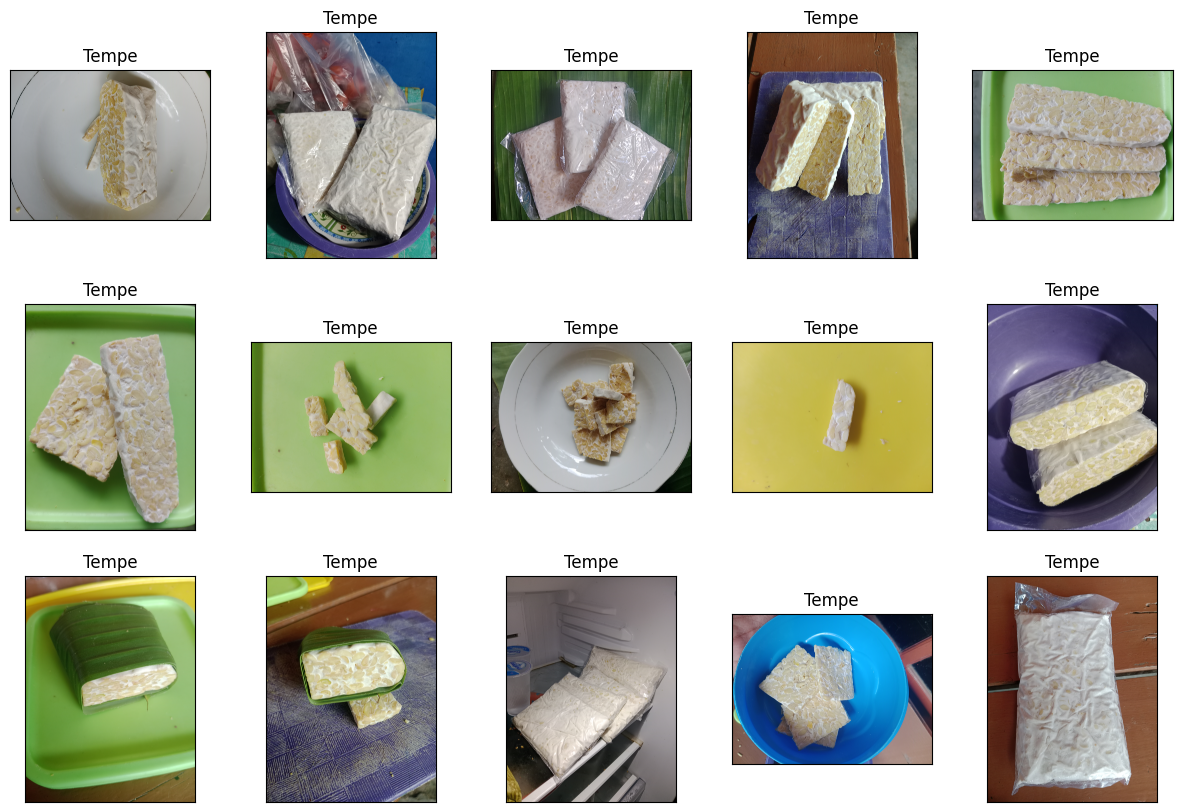

In [7]:
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(15,10), subplot_kw={'xticks':[], 'yticks':[]})
for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(df.image[i]))
    ax.set_title(df.label[i])
    
plt.show()

In [8]:
df.label.value_counts()

Tempe       100
kecambah    100
tahu        100
Name: label, dtype: int64

In [9]:
df = df[df['label'].apply(lambda x: x[-2:] != 'GT')].reset_index(drop=True)
df.label.value_counts()

Tempe       100
kecambah    100
tahu        100
Name: label, dtype: int64

In [10]:
x_train, x_test = train_test_split(df, test_size=0.3,random_state=30)
x_train, x_val = train_test_split(x_train, test_size=0.2, random_state=30)

In [11]:
print("Shape of training data", x_train.shape)
print("Shape of test data", x_test.shape)
print("Shape of validation data", x_val.shape)

Shape of training data (168, 2)
Shape of test data (90, 2)
Shape of validation data (42, 2)


In [12]:
image_data_generator = ImageDataGenerator(rescale = 1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
train = image_data_generator.flow_from_dataframe(dataframe=x_train, x_col='image', y_col='label', target_size=(200,200), color_mode='rgb', class_mode='categorical', shuffle=False)
test = image_data_generator.flow_from_dataframe(dataframe=x_test, x_col='image', y_col='label', target_size=(200,200), color_mode='rgb', class_mode='categorical', shuffle=False)
val = image_data_generator.flow_from_dataframe(dataframe=x_val, x_col='image', y_col='label', target_size=(200,200), color_mode='rgb', class_mode='categorical',shuffle=False)

Found 168 validated image filenames belonging to 3 classes.
Found 90 validated image filenames belonging to 3 classes.
Found 42 validated image filenames belonging to 3 classes.


In [13]:
input_shape = (200, 200, 3)

In [14]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=input_shape ),
    tf.keras.layers.MaxPool2D(pool_size = (2,2)),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size = (2,2)),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size = (2,2)),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size = (2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 32)        18464     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 23, 23, 32)       0

In [16]:
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=["accuracy"])
callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=4)
history = model.fit(train, batch_size= 16, validation_data=val, epochs=50, callbacks=callback)

Epoch 1/50
6/6 [==============================] - 86s 14s/step - loss: 0.7355 - accuracy: 0.6250 - val_loss: 0.8203 - val_accuracy: 0.6190
Epoch 2/50
6/6 [==============================] - 70s 11s/step - loss: 0.7673 - accuracy: 0.6012 - val_loss: 0.6071 - val_accuracy: 0.7143
Epoch 3/50
6/6 [==============================] - 80s 15s/step - loss: 0.6714 - accuracy: 0.6429 - val_loss: 0.5913 - val_accuracy: 0.8333
Epoch 4/50
6/6 [==============================] - 82s 14s/step - loss: 0.6402 - accuracy: 0.6905 - val_loss: 0.7271 - val_accuracy: 0.6905
Epoch 5/50
6/6 [==============================] - 73s 12s/step - loss: 0.6336 - accuracy: 0.6607 - val_loss: 0.5425 - val_accuracy: 0.8095
Epoch 6/50
6/6 [==============================] - 81s 15s/step - loss: 0.5569 - accuracy: 0.7619 - val_loss: 0.4729 - val_accuracy: 0.7619
Epoch 7/50
6/6 [==============================] - 73s 12s/step - loss: 0.5397 - accuracy: 0.7619 - val_loss: 0.4416 - val_accuracy: 0.8095
Epoch 8/50
6/6 [===========

In [17]:
model.save('model-1.h5')

In [18]:
accuracy = history.history['accuracy']
val_accuracy  = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

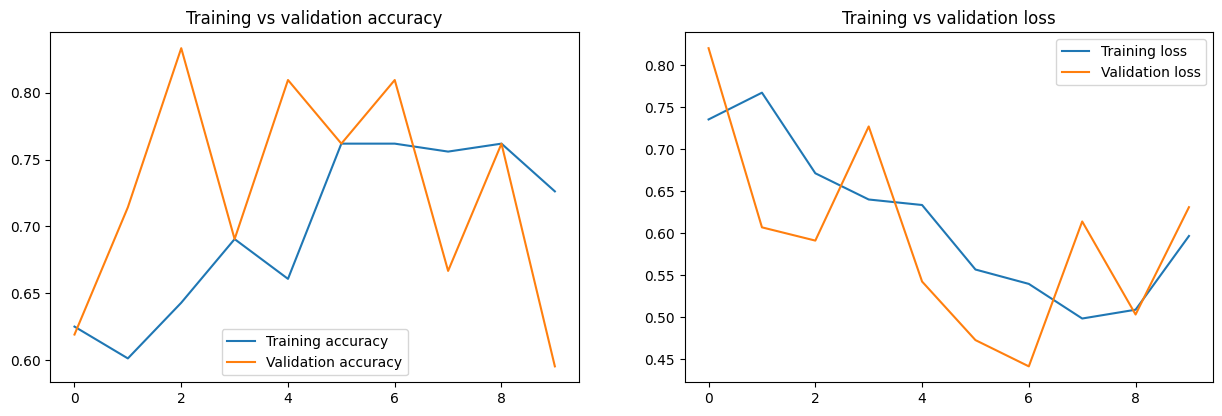

In [19]:
plt.figure(figsize=(15,10))
plt.subplot(2, 2, 1)
plt.plot(accuracy, label = "Training accuracy")
plt.plot(val_accuracy, label="Validation accuracy")
plt.legend()
plt.title("Training vs validation accuracy")
plt.subplot(2,2,2)
plt.plot(loss, label = "Training loss")
plt.plot(val_loss, label="Validation loss")
plt.legend()
plt.title("Training vs validation loss")
plt.show()

In [20]:
pred = model.predict(test)

3/3 [==============================] - 26s 8s/step


In [21]:
pred = np.argmax(pred, axis=1)

In [22]:
labels = train.class_indices

In [23]:
labels

{'Tempe': 0, 'kecambah': 1, 'tahu': 2}

In [25]:
labels = dict((v,k) for k, v in labels.items())

In [26]:
labels

{0: 'Tempe', 1: 'kecambah', 2: 'tahu'}

In [27]:
y_pred = [labels[k] for k in pred]

In [28]:
print(classification_report(x_test.label, y_pred))

              precision    recall  f1-score   support

       Tempe       0.57      0.79      0.66        33
    kecambah       0.77      0.82      0.79        33
        tahu       0.89      0.33      0.48        24

    accuracy                           0.68        90
   macro avg       0.74      0.65      0.65        90
weighted avg       0.73      0.68      0.66        90



In [29]:
print(confusion_matrix(x_test.label, y_pred))

[[26  6  1]
 [ 6 27  0]
 [14  2  8]]


In [30]:
test_accuracy = model.evaluate(test)[1]

3/3 [==============================] - 26s 8s/step - loss: 0.5357 - accuracy: 0.8000
